

Comprises 5 main tasks: Data Exploration, Data Preprocessing, Model Training, Model Evaluation, and Model Analysis. You will analyze and compare two different representations, Bag of Words (BOW) and Term Frequency-Inverse Document Frequency (TF-IDF). Additionally, you will address and compare two tasks: sentiment analysis and rating prediction.


The dataset you will work with in this assignment comprises text reviews about various hotels, extracted from Tripadvisor, along with their corresponding ratings.


## Task 1: Data Exploration





1. Load the dataset from the file "hotel_reviews.csv". How many records does the dataset contain? How many distinct classes are there in the dataset?


In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
# Provide your answers here

# load the data
ratings_data = pd.read_csv("Ratings.csv")

# Display the total number of Records in the dataset.
ratings_data.count()

Review    20491
Rating    20491
dtype: int64

In [3]:
ratings_data.columns

Index(['Review', 'Rating'], dtype='object')

In [4]:
# Display the distinct classes in the dataset.
ratings_data['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

2. Determine the top 10 most frequently used words in the dataset. To support your answer, create a bar plot where the x-axis represents words, and the y-axis represents the frequency of each word appearing in the entire dataset.


In [5]:

from collections import Counter
import matplotlib.pyplot as plt

In [6]:
# Provide your answers here

review_text = " ".join(ratings_data['Review'])

text_words = review_text.split()

word_count = Counter(text_words)

top_10_words = word_count.most_common(10)

words, freq = zip(*top_10_words)

In [7]:
top_10_words

[('hotel', 42079),
 ('not', 30750),
 ('room', 30532),
 ('great', 18732),
 ("n't", 18436),
 ('staff', 14950),
 ('good', 14791),
 ('did', 13433),
 ('just', 12458),
 ('stay', 11376)]

Text(0.5, 1.0, 'Simple Bar Plot')

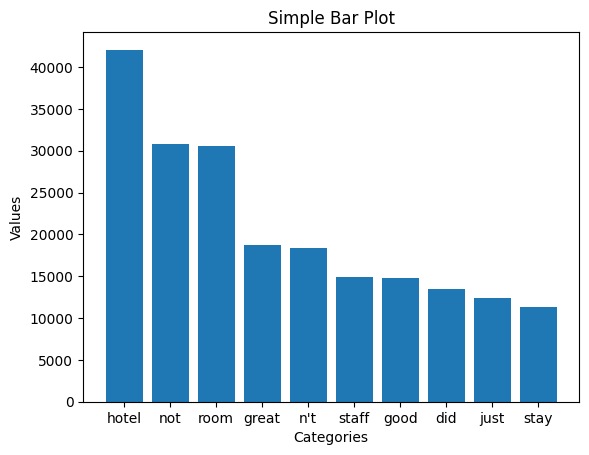

In [8]:
# Bar plot to display the top 10 most frequent words
plt.bar(words, freq)
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Simple Bar Plot")



3. Among the top 10 most frequently used words, identify if there are any stop words included. If we exclude the stop words, would the top 10 most frequent words change? Create another bar plot similar to Question 2, but this time with the stop words removed to illustrate the updated top 10 most frequent words.

In [9]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/s4698443/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/s4698443/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/s4698443/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Provide your answers here
stop_words = stopwords.words('english')

common_words = list(set(stop_words) & set(words))

words_list = [word for word in text_words if word not in common_words]

words_count = Counter(words_list)

In [11]:
new_top_10_words = words_count.most_common(10)

words, freq = zip(*new_top_10_words)

In [12]:
new_top_10_words

[('hotel', 42079),
 ('room', 30532),
 ('great', 18732),
 ("n't", 18436),
 ('staff', 14950),
 ('good', 14791),
 ('stay', 11376),
 ('no', 11360),
 ('rooms', 10935),
 ('nice', 10918)]

Text(0.5, 1.0, 'Bar Plot for new Top 10 words')

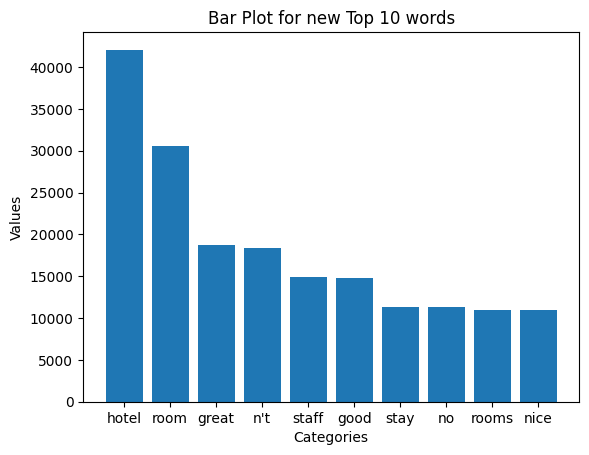

In [13]:
# Bar plot to display the new top 10 most frequent words
plt.bar(words, freq)
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Bar Plot for new Top 10 words")

## Task 2: Data Preprocessing

- Use the provided "clean_data" function to remove unnecessary symbols and clean the dataset.



In [14]:
import re

def clean_data(text):
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'br', ' ', text)
    text = re.sub(r'\'', ' ', text)
    

    return text

In [15]:
# Provide your answers here
ratings_data["Review"] = ratings_data["Review"].apply(clean_data)

- Split the clean dataset into separate train and test sets. For this, use the "Review" field as the feature vector (X) and the "Rating" field as the label vector (Y).

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

# define random state to make random processes reproducible
random_state = np.random.RandomState(0)

In [17]:
# Provide your answers here
# Define X(features) and y(target)
X = ratings_data["Review"]
y = ratings_data["Rating"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=random_state)

- Create an additional binary label by assigning ‘1’ – positive for the product ratings 4 and 5; and "–1" for product ratings 1, 2 and 3. Store it in y_train_binary and y_test_binary. 

*Tip: you can use a function copy.deepcopy for creating a copy of label variables*

In [18]:
import copy

In [19]:
# Provide your answers here
y_train_binary = copy.deepcopy(y_train)
y_test_binary = copy.deepcopy(y_test)

label_map = {True: 1, False: -1}

y_train_binary = y_train_binary.isin([4, 5]).map(label_map)
y_test_binary = y_test_binary.isin([4, 5]).map(label_map)


- Transform the cleaned data into a numerical representation using Bag of Words (BoW) and remove any stop words. Save the BoW representation in the variables train_data_BOW and test_data_BOW.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Provide your answers here
# define CountVectorizer object
# min_df=0.01 means words that belong to only 1% of the all tweets will be excluded in the BOW
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), min_df=0.01)

# fit the vectorizer object to train data
vectorizer.fit(X_train)

# get the BOW for train data
X_train_BOW = vectorizer.transform(X_train)

# visualize BOW
train_data_BOW = pd.DataFrame(data=X_train_BOW.toarray(), columns=vectorizer.get_feature_names_out()).T

# get the BOW for test data
X_test_BOW = vectorizer.transform(X_test)

# visualize BOW
test_data_BOW = pd.DataFrame(data=X_test_BOW.toarray(), columns=vectorizer.get_feature_names_out()).T

# display the last few rows of the dataframe
train_data_BOW.head(5)

,0,1,2,3,4,5,6,7,8,9,...,14333,14334,14335,14336,14337,14338,14339,14340,14341,14342
00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Create another numerical representation of the text using Term Frequency-Inverse Document Frequency (TfIdf) and remove the stop words. Save the TfIdf representation in the variables train_data_tfidf and test_data_tfidf.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Provide your answers here

# min_df=0.01 means words that belong to only 1% of the all tweets will be excluded in the BOW
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), min_df=0.01)

# fit the vectorizer object to train data
vectorizer.fit(X_train)

# get the Tfidf for train data
X_train_tfidf = vectorizer.transform(X_train)

# visualize Tfidf
train_data_tfidf = pd.DataFrame(data=X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out()).T


# get the Tfidf for test data
X_test_tfidf = vectorizer.transform(X_test)

# visualize Tfidf
test_data_tfidf = pd.DataFrame(data=X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out()).T

# display the last few rows of the dataframe
train_data_tfidf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,14333,14334,14335,14336,14337,14338,14339,14340,14341,14342
00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
10,0.044204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
100,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
11,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044199
12,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


## Task 3: Model Training

Define 3 Logistic Regression models: *model1, model2* and *model3* and train the models as follows:
- Train the first Logistic Regression model using the Bag of Words representation (train_data_BOW) to predict the hotel rating (Y).

- Train the second Logistic Regression model using the TfIdf representation (train_data_tfidf) to predict the hotel rating (Y).

- Train the third Logistic Regression model using the TfIdf representation (train_data_tfidf) to predict the binary sentiment label (Y_binary). 

- Make and store predictions on appropriate test sets (X_test_BOW for model1 and X_test_tfidf for model2 and model3)

In [22]:
from sklearn.linear_model import LogisticRegression

# Provide your answers here

# define lgositic regression model1 object
log_reg1 = LogisticRegression(random_state=random_state)

# fit the model to training data
log_reg1.fit(X_train_BOW, y_train)

LogisticRegression(random_state=RandomState(MT19937) at 0x7FFF5C8BD540)

In [23]:
# predict using log_reg object
y_test_log_reg1_predictions = log_reg1.predict(X_test_BOW)

# view the predictions
y_test_log_reg1_predictions

array([2, 1, 5, ..., 5, 4, 5])

In [24]:
# define lgositic regression model2 object
log_reg2 = LogisticRegression(random_state=random_state)

# fit the model to training data
log_reg2.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=RandomState(MT19937) at 0x7FFF5C8BD540)

In [25]:
# make prediction on test data

# predict using log_reg object
y_test_log_reg2_predictions = log_reg2.predict(X_test_tfidf)

# view the predictions
y_test_log_reg2_predictions

array([2, 4, 5, ..., 5, 4, 5])

In [26]:
# define logsitic regression model3 object
log_reg3 = LogisticRegression(random_state=random_state)

# fit the model to training data
log_reg3.fit(X_train_tfidf, y_train_binary)

LogisticRegression(random_state=RandomState(MT19937) at 0x7FFF5C8BD540)

In [27]:
# make prediction on test data

# predict using log_reg object
y_test_log_reg3_predictions = log_reg3.predict(X_test_tfidf)

# view the predictions
y_test_log_reg3_predictions

array([-1, -1,  1, ...,  1,  1,  1])


## Task 4: Model Evaluation

- Compute and compare the test accuracy of Model 1 (Logistic Regression with BoW representation) and Model 2 (Logistic Regression with TfIdf representation). Based on your results, determine which embedding method yields higher performance in predicting the hotel ratings (Y).

In [28]:
from sklearn.metrics import accuracy_score

# Provide your answers here
accuracy_score(y_test, y_test_log_reg1_predictions)

0.5655497722836695

In [29]:
accuracy_score(y_test, y_test_log_reg2_predictions)

0.6032856213402733

Based on the the results of the test accuracy of both the models, it can be determined that the model1 has a lower accuracy score of ~57% and the accuracy score of model2 is ~60%. Based on these results, model2 has a higher accuracy which means that the Tfidf representation embedding method yields higher performance in predicting the hotel ratings.

- Compute and compare the test accuracy of Model 2 and Model 3. Based on your results, analyze which task is easier: binary sentiment prediction or multi-class rating prediction.

In [30]:
# Provide your answers here
accuracy_score(y_test, y_test_log_reg2_predictions)

0.6032856213402733

In [31]:
accuracy_score(y_test_binary, y_test_log_reg3_predictions)

0.8885816525699415

The results show that the accuracy score for the model3 is ~89%. In comparison to model2 which has an accuracy score of ~60%. Based on these results, the binary sentiment prediction is easier than multi-class rating prediciton as model3 is just predicting between 1 or -1. 



- For Model 2,  compute additional evaluaton measures, namely confusion matrix, precision and recall.  

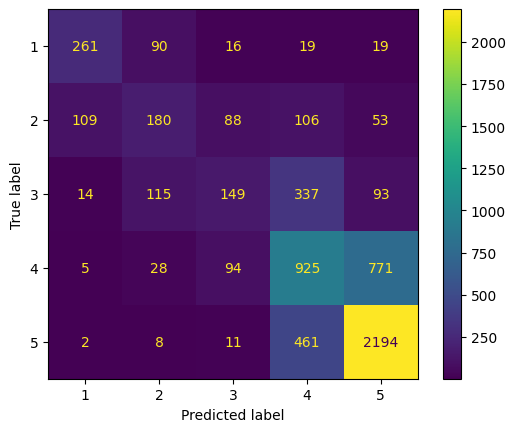

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Provide your answers here
cm = confusion_matrix(y_test, y_test_log_reg2_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg2.classes_)
display.plot();

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_log_reg2_predictions))

              precision    recall  f1-score   support

           1       0.67      0.64      0.66       405
           2       0.43      0.34      0.38       536
           3       0.42      0.21      0.28       708
           4       0.50      0.51      0.50      1823
           5       0.70      0.82      0.76      2676

    accuracy                           0.60      6148
   macro avg       0.54      0.50      0.51      6148
weighted avg       0.58      0.60      0.59      6148



The above shows the precision and recall for each of the labels. In order to balance the precision and recall scores for the model, the f1 score takes into account both the precision and recall. The f1 score for the model is 60%. 

## Task 5: Model Analysis



- Based on the confusion matrix obtained in the previous question (referring to Model 2, the Logistic Regression with TfIdf representation for rating prediction), identify and state the number of samples that were classified to have the rating of 5 (the highest rating), but in reality, they had an actual rating of 1 (the lowest rating).

The number of samples that were classified to have rating of 5 but in reaity had an actual rating of 1 was 19.


- Discuss the importance of considering alternative evaluation measures, such as precision and recall, instead of relying solely on accuracy. Based on this discussion, identify the most suitable evaluation metric for Model 2.

The importance of considering alternative evaluation measures such as precision and recall instead of just accuracy is because accuracy might not be reliable when there is a large class imbalance. Since the accuracy of model2 was ~60%, the most suitable evaluation metric would be getting the f1 score from the precision and recall of the model.


- For binary sentiment prediction (Model 3), visualize important words with their model coefficients.  

*Tip: you can reuse the function plot_coefficients from prac. session.*

In [34]:
# function adapted from https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.xlabel("Important Words")
    plt.ylabel("Model Coefficient")
    plt.title("Important words with their model coefficient")
    plt.show()

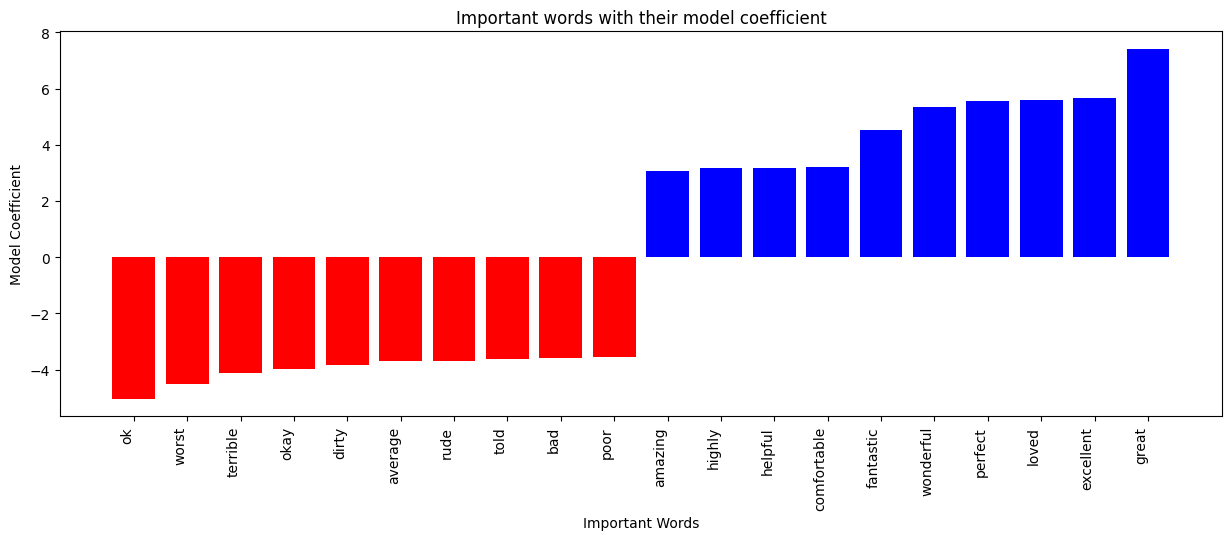

In [35]:
plot_coefficients(log_reg3, vectorizer.get_feature_names_out())

The plot shows 20 words which played important role in making predictions. The red bars show top 10 words with negative model coefficient and blue bars show top 10 words with positive model coefficient values.